Accessing CEFI data with R
===
This example requires you to have used conda or mamba to install the [cefi-cookbook environment as explained here](python_get_cefi.ipynb).

The following notebook is a quick demostration on how to use R to access the CEFI Cloud data. This is designed for users that prefer the programing interface to be R. There are already couple of great resource related to preprocessing and visualizing data in R. Therefore, the notebook will not repeat that part of the code but focusing on how to accessing the data from a R interface. The resources is listed below 
> - http://cran.nexr.com/web/packages/rerddap/vignettes/Using_rerddap.html (A detail introduction of rerddap package and show the visualization in many different datasets)
> - https://ioos.github.io/ioos_code_lab/content/code_gallery/data_access_notebooks/2017-08-01-xtractoR.html (use a different package called xtractomatic to access the ERDDAP data)

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Launch R in Jupyterlab</p>
    In addition to the standard R code demonstrated below, our current interface leverages JupyterLab to execute R code using the R kernel. To enable this functionality, we utilize the environment.yml file to create a Conda/Mamba environment. The primary objective is to install the r-irkernel package within this environment.

This installation of r-irkernel through Conda/Mamba ensures that the R kernel becomes available as an option when launching JupyterLab. Selecting the R kernel empowers users to utilize the JupyterLab interface for running R code effortlessly.
    
</div>

## Packages used
In this example, we are going to use the _reticulate_ library with Python to read the CEFI data into an R data structure.

From there you can operate on the data in R (or R Studio) as you would any other data.

## We'll install _reticulate_ and its dependencies in the cell below.
    This may take several mintues. You only have to do this once.
    Next time you can skip directly to the library(reticulate) step.

In [ ]:
options(repos="https://CRAN.R-project.org")
install.packages("reticulate")
install.packages("maps")

In [1]:
library(reticulate)
library(dplyr)
library(maps)
library(ggplot2)
reticulate::py_config()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




python:         /home/schweitzer/miniforge3/envs/cefi-cookbook/bin/python3
libpython:      /home/schweitzer/miniforge3/envs/cefi-cookbook/lib/libpython3.10.so
pythonhome:     /home/schweitzer/miniforge3/envs/cefi-cookbook:/home/schweitzer/miniforge3/envs/cefi-cookbook
version:        3.10.16 | packaged by conda-forge | (main, Dec  5 2024, 14:16:10) [GCC 13.3.0]
numpy:          /home/schweitzer/miniforge3/envs/cefi-cookbook/lib/python3.10/site-packages/numpy
numpy_version:  1.26.4

NOTE: Python version was forced by PATH

python versions found: 
 /home/schweitzer/miniforge3/envs/cefi-cookbook/bin/python3
 /home/schweitzer/miniforge3/envs/cefi-cookbook/bin/python

In [2]:
use_condaenv('cefi-cookbook')

## Get some python tools to read the data from the cloud storage
fsspec and xarray are python packages that are in the conda environment we build to run this notebook.
We're going to import them into our R environment and use them to create a pandas dataframe with lat,lon,tos as the columns

In [3]:
xr <- import('xarray')
fsspec <- import('fsspec')

## Get some data from the cloud...
- Read the data
- select a time slice

In [11]:
fs <- fsspec$filesystem('reference', 
    remote_protocol='gcs',
    fo='gcs://noaa-oar-cefi-regional-mom6-nwa/northwest_atlantic/full_domain/hindcast/monthly/regrid/r20230520/tos.nwa.full.hcast.monthly.regrid.r20230520.199301-201912.json'
)
m <- fs$get_mapper()
dataset <- xr$open_dataset(m, engine='zarr', consolidated=FALSE)
subset <- dataset$sel(time='2012-12')

[1] "2012-12-16 04:00:00 PST"

Get the variable long_name, date of the slice and data set title for the plot below

In [16]:
datetime <- subset$time$values
title <- subset$attrs$title
long_name <- subset$tos$attrs$long_name

## Reorganize that data into a data.frame with lon,lat,tos as columns.
**Take care:** We are expanding along lon first and then by lat, so we reorder the xarray so that lon varies fastest to match.

In [5]:
subset <- subset$transpose('lon','lat','time')
df <- expand.grid(x = subset$lon$values, y=subset$lat$values)
data <- as.vector(t(matrix(subset$tos$values)))
df$Data <- data
names(df) <- c("lon", "lat", "tos")

## Subset the data set with filter to extract the points over the Gulf

In [6]:
df_gulf = filter(df, lat>17)
df_gulf = filter(df_gulf, lat<31)
df_gulf = filter(df_gulf, lon>260)
df_gulf = filter(df_gulf, lon<290)
df_gulf

lon,lat,tos
<dbl[1d]>,<dbl[1d]>,<dbl>
261.5577,17.00457,NaN
261.6384,17.00457,NaN
261.7191,17.00457,NaN
261.7998,17.00457,NaN
261.8804,17.00457,NaN
261.9611,17.00457,NaN
262.0418,17.00457,NaN
262.1225,17.00457,NaN
262.2031,17.00457,NaN


# The model lons are from 0 to 360, so we're going to use this function to normalize them to -180 to 180
The map polygons are defined on -180 to 180 we need to adjust our values to see them on the map

In [7]:
normalize_lon <- function(x) {
  quotient <- round(x / 360.)
  remainder <- x - (360. * quotient)
  # Adjust sign if necessary to match IEEE behavior
  if (sign(x) != sign(360.) && remainder != 0) {
    remainder <- remainder + sign(360.) * 360.
  }
  return(remainder)
}
df_gulf$lon <- unlist(lapply(df_gulf$lon, normalize_lon))

## Set up a resonable plot size and limits for the plot area of the world base map

In [8]:
options(repr.plot.width = 10, repr.plot.height = 10)
ylim <- c( min(df_gulf$lat), max(df_gulf$lat) )
xlim <- c( min(df_gulf$lon), max(df_gulf$lon) )

## Plot a dot colored according to the value of tos at each lat/lon location

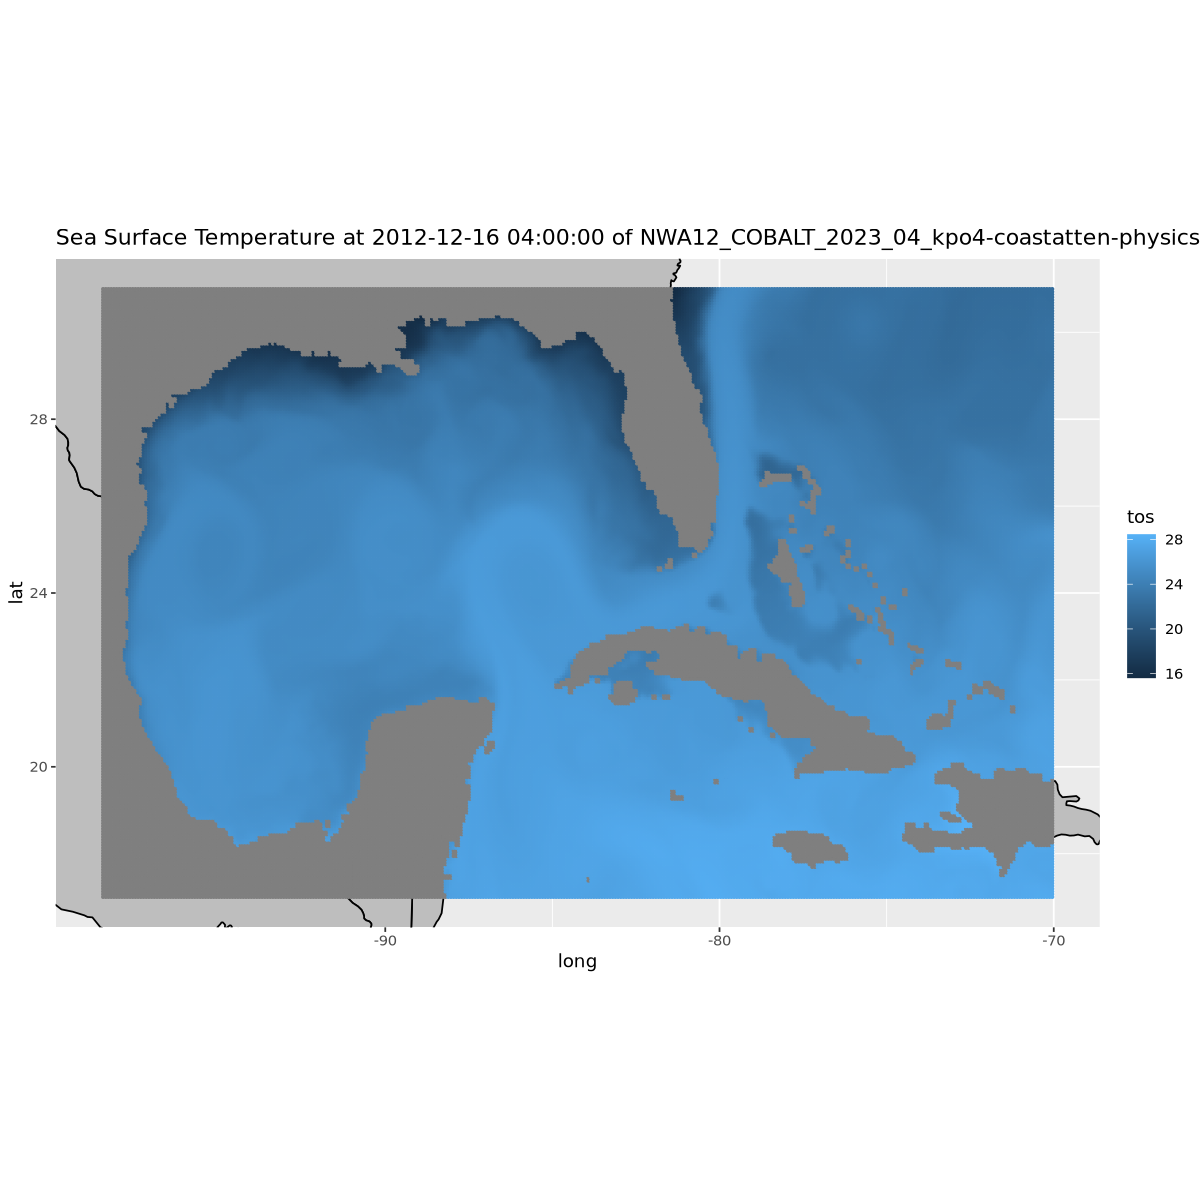

In [19]:
w <- map_data( 'world', ylim = ylim, xlim = xlim )
p = ggplot() + 
    geom_polygon(data = w, aes(x=long, y = lat, group = group), fill = "grey", color = "black") +
    coord_fixed(1.3, xlim = xlim, ylim = ylim) + 
    geom_point(data = df_gulf, aes(color = tos, y=lat, x=lon), size=.5) +
    labs(title = paste(long_name, 'at', datetime, 'of', title))
p